# ANN & MNIST : exercise 시발 다시해야 됨
---

## 라이브러리 불러오기

In [23]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [24]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [25]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

id = 6147
다음 그림은 숫자 7 입니다.


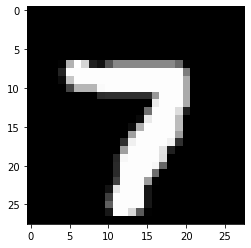

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [26]:
train_x_re = train_x.reshape([train_x.shape[0], -1]) #train_x.shape[0] == 60000, 그림은 관습적으로 reshape 해준다
test_x_re = test_x.reshape([test_x.shape[0], -1])

* min-max scaling

In [27]:
print(f"max : {train_x_re.max()} / min : {train_x_re.min()}")

max : 255 / min : 0


In [28]:
from sklearn.preprocessing import MinMaxScaler
mm_scale = MinMaxScaler()

In [29]:
train_x_re = mm_scale.fit_transform(train_x_re)
test_x_re = mm_scale.fit_transform(test_x_re)

In [10]:
print(f"max : {test_x_re.max()} / min : {test_x_re.min()}")

max : 1.0 / min : 0.0


In [ ]:
#정석
# max_n, min_n = train_x_re.max(), train_x_re.min()
# train_x = (train_x - min_n) / (max_n - min_n)
# test_x = (test_x - min_n) / (max_n - min_n)

* target feature : One-hot Encoding - feature가 1개라 one-hot encoding을 한다

In [11]:
train_y.shape

(60000,)

In [30]:
from tensorflow.keras.utils import to_categorical
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [31]:
len_y = len(set(train_y))
train_y.shape

(60000,)

In [32]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [15]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [16]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000, 10))

In [33]:
########################
# 모델링 I : .fit( ) 까지! : Sequential API
########################
#Sequential API

#1. 세션 클리어
keras.backend.clear_session()
 
#2. 모델 선언
model = keras.models.Sequential()

#3. 레이어 조립
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation = "softmax"))

#4. 컴파일
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

#5. 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
es = EarlyStopping(monitor = "val_loss", min_delta = 0, patience = 5, verbose = 1,
                            restore_best_weights = True)

In [37]:
model.fit(train_x_re, train_y, callbacks = [es], verbose = 1, epochs = 50, validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.9251 - val_loss: 0.2497 - val_accuracy: 0.9303
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2626 - accuracy: 0.9271 - val_loss: 0.2522 - val_accuracy: 0.9318
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2592 - accuracy: 0.9278 - val_loss: 0.2522 - val_accuracy: 0.9325
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9286 - val_loss: 0.2499 - val_accuracy: 0.9315
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2548 - accuracy: 0.9289 - val_loss: 0.2514 - val_accuracy: 0.9322
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2525 - accuracy: 0.9300 - val_loss: 0.2509 - val_accuracy: 0.9332
Epoch 6: early stopping


In [38]:
pred_train = model.predict(train_x_re)
pred_test = model.predict(test_x_re)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 92.85%
테스트 정확도 : 92.31%


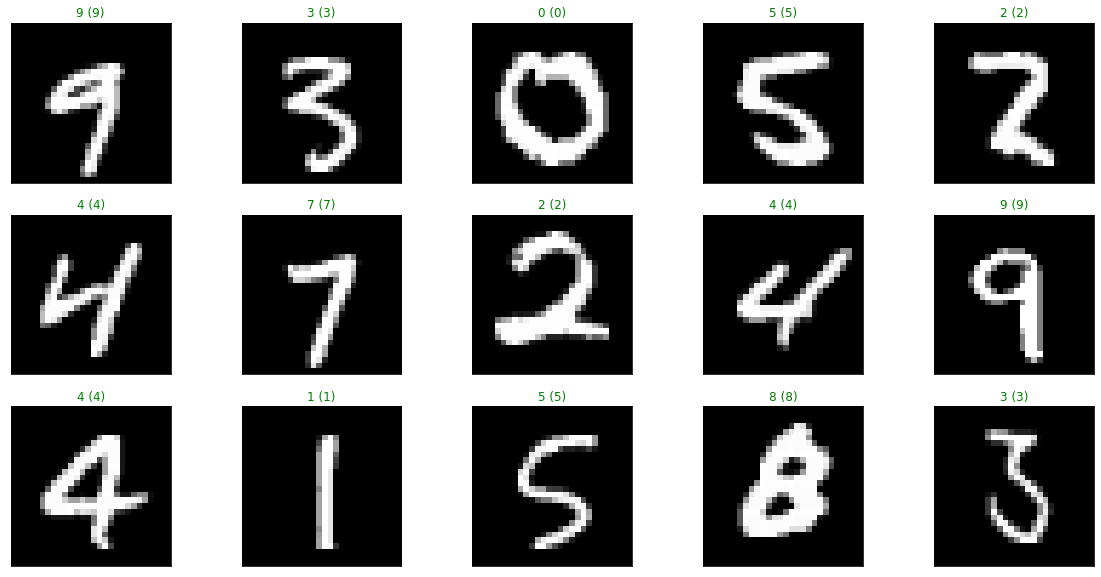

In [40]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 1466
다음 그림은 숫자 5 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [23.  0.  0. 37.  0. 26.  0.  2.  8.  0.]
틀렸어요


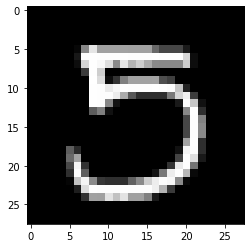

In [41]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x_re, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.9268


[0.2701127827167511, 0.926800012588501]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [42]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000, 10))

In [43]:
#########################
# 모델링 II : .fit( ) 까지!
#########################
#1. 세션 클리어
keras.backend.clear_session()

#2. 모델 선언
model = keras.models.Sequential()

#3. 모델 블록 조립
model.add(keras.layers.Input(shape = (28, 28)))
model.add(keras.layers.Flatten()) #reshape와 똑같은 기능 2차원 -> 1차원, 학습X
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#4. 컴파일
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

#5. 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [44]:
es = EarlyStopping(monitor = "val_loss",    #관측 대상
                            min_delta = 0,
                            patience = 5,
                            verbose = 1,
                            restore_best_weights = True)

In [45]:
model.fit(train_x, train_y, epochs = 100, verbose = 1, callbacks = [es], validation_split = 0.2)

Epoch 1/100
1500/1500 [==============================] - 8s 4ms/step - loss: 1.1956 - accuracy: 0.8613 - val_loss: 0.3507 - val_accuracy: 0.9164
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2665 - accuracy: 0.9312 - val_loss: 0.2377 - val_accuracy: 0.9374
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1930 - accuracy: 0.9470 - val_loss: 0.1736 - val_accuracy: 0.9541
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1593 - accuracy: 0.9550 - val_loss: 0.2365 - val_accuracy: 0.9394
Epoch 5/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1346 - accuracy: 0.9603 - val_loss: 0.1543 - val_accuracy: 0.9563
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1217 - accuracy: 0.9652 - val_loss: 0.1903 - val_accuracy: 0.9509
Epoch 7/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1104 - accuracy: 0.9682 - val_loss: 0.1340 - val_ac

In [46]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 97.44%
테스트 정확도 : 96.53%


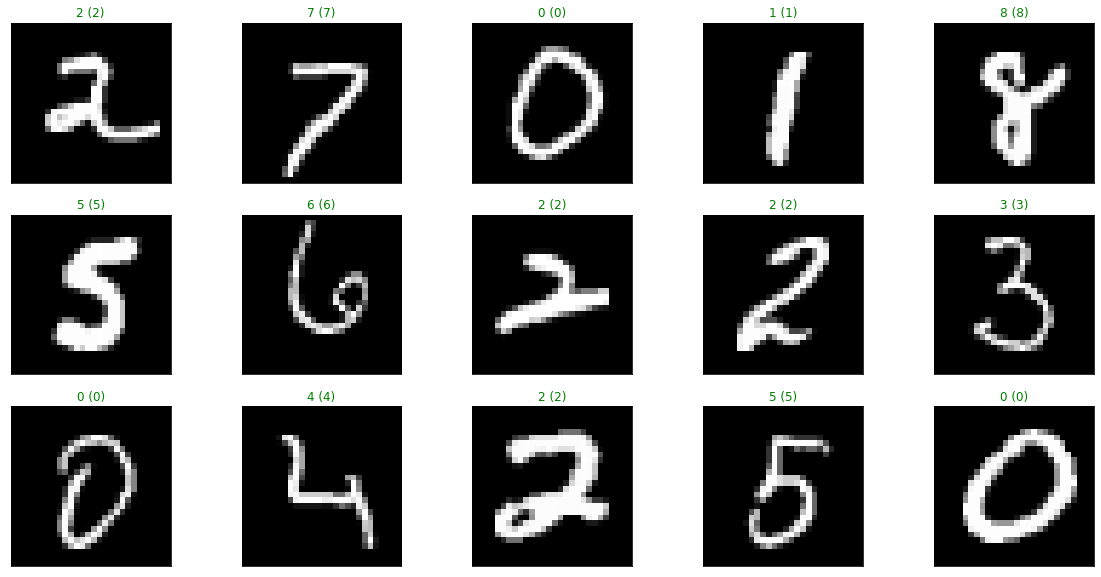

In [47]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 9679
다음 그림은 숫자 6 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 0.  0.  0. 31.  0. 30. 28.  0.  7.  0.]
틀렸어요


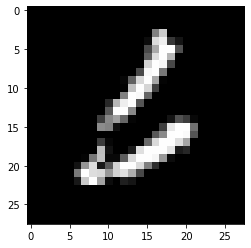

In [49]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)